Distance to source =  3.230020789313518e+28 cm
Chirp Mass =  87124.67416745944 solMass
0.006967803408563178 Hz 0.013926057520540843 Hz 0.009675028990556316 Hz
0.0019894367886486917 Hz


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


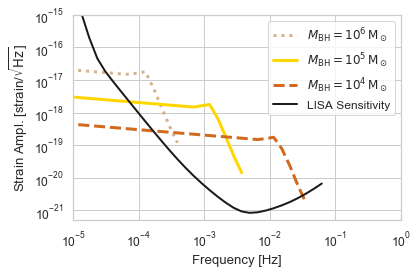

[0.00471487 0.32374575] Hz [2.81578026e-19 7.18502240e-21] [2.50290199e-19 2.37734779e-20] 1 / (Hz(1/6) s(1/6))
[0.00202359 0.07906043] Hz [2.14021360e-18 3.35508322e-21] [1.96336781e-18 4.79599974e-21] 1 / (Hz(1/6) s(1/6))
[0.00086851 0.00471487] Hz [1.74308310e-17 2.81578026e-19] [1.54013748e-17 3.89342220e-19] 1 / (Hz(1/6) s(1/6))
ChirpMass = 8.712467e+03 Msolar
DeltaF =  0.0009569422183237705 Hz
freqrange =  [0.001      0.0010138  0.00102778 0.00104196 0.00105634 0.00107091
 0.00108568 0.00110066 0.00111585 0.00113124 0.00114685 0.00116267
 0.00117871 0.00119497 0.00121146 0.00122817 0.00124511 0.00126229
 0.00127971 0.00129736 0.00131526 0.0013334  0.0013518  0.00137045
 0.00138936 0.00140852 0.00142796 0.00144766 0.00146763 0.00148788
 0.0015084  0.00152921 0.00155031 0.0015717  0.00159338 0.00161536
 0.00163765 0.00166024 0.00168315 0.00170637 0.00172991 0.00175377
 0.00177797 0.0018025  0.00182736 0.00185257 0.00187813 0.00190404
 0.00193031 0.00195694]


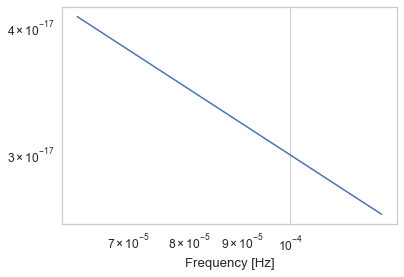






Mchirp =  100.0 solMass
lowerlimit detector frame =  6.25e-05 Hz
upperlimit detector frame =  0.0010382846047881308 Hz
lowerlimit detector frame =  6.25e-05 Hz
upperlimit detector frame =  0.0010382846047881308 Hz
SNR =  0.0023588242522509743


Mchirp =  464.15888336127773 solMass
lowerlimit detector frame =  6.25e-05 Hz
upperlimit detector frame =  0.00043634131458647436 Hz
lowerlimit detector frame =  6.25e-05 Hz
upperlimit detector frame =  0.00043634131458647436 Hz
SNR =  0.0011464779165287152


Mchirp =  2154.4346900318824 solMass
lowerlimit detector frame =  6.25e-05 Hz
upperlimit detector frame =  0.00020572559282649097 Hz
lowerlimit detector frame =  6.25e-05 Hz
upperlimit detector frame =  0.00020572559282649097 Hz
SNR =  0.0005550118453304393


Mchirp =  10000.0 solMass
lowerlimit detector frame =  6.25e-05 Hz
upperlimit detector frame =  0.00011737240077568984 Hz
lowerlimit detector frame =  6.25e-05 Hz
upperlimit detector frame =  0.00011737240077568984 Hz
SNR =  0.000

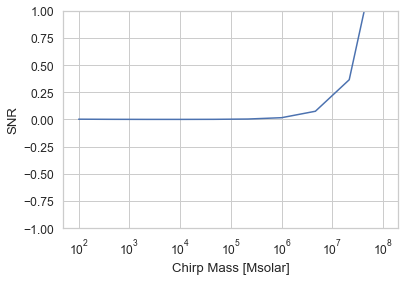

In [7]:
#now with corrected sqrt(frequency)
#now with Inspiral Merger Ringdown (IMR) strain evolution

import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck13 as cosmo#FlatLambdaCDM
from astropy.constants import G, c
import astropy.units as u
from scipy.integrate import quad
# cosmetic part
import seaborn as sns
sns.set(font_scale=1.1)
sns.set_style("whitegrid")



###############
#Calculation of strain
#h = (G/c^4)*M^{5/3}*Omega^{2/3}/r
SolarMass = 1.99e33
LISAMissionTime  = 10*u.yr
Redshift = 15
#The A1 sensitivity curve has an arm length of 1 million km
def LISASensitivityCurveA1(f, L):
    Sacc = (9e-30/(2*np.pi*f)**4)*(1+ 1e-4/f)*(u.m)**2/u.Hz  #in m^ Hz^-1 from Klein et al (2016)
    SsnA1 = 1.98e-23*(u.m)**2/u.Hz
    Somn = 2.65e-23*(u.m)**2/u.Hz
    #print("Sacc = ", Sacc)
    S = (20.0/3.0)*(4*Sacc + SsnA1 + Somn)/L.to('m')**2
    #print("S = ", S)
    S1 = 1 + ((f*u.Hz).to('1/s')/(0.41*c.to('km/s')/(2*L.to('km'))))**2
    S = S*S1
    #print("S = ", S)
    return S

#The A5 sensitivity curve has an arm length of 5 million km
def LISASensitivityCurveA5(f, L):
    Sacc = (9e-30/(2*np.pi*f)**4)*(1+ 1e-4/f)*(u.m)**2/u.Hz  #in m^ Hz^-1 from Klein et al (2016)
    SsnA5 = 2.96e-23*(u.m)**2/u.Hz
    Somn = 2.65e-23*(u.m)**2/u.Hz
    #print("Sacc = ", Sacc)
    S = (20.0/3.0)*(4*Sacc + SsnA5 + Somn)/L.to('m')**2
    #print("S = ", S)
    S1 = 1 + ((f*u.Hz).to('1/s')/(0.41*c.to('km/s')/(2*L.to('km'))))**2
    S = S*S1
    #print("S = ", S)
    return S

#The LISA sensitivity curve from Babak et al. (2018)
def LISABabak(f):
    L = 2.5e9*u.m
    Sacc = (9e-30+3.24e-28*(np.power(3e-5*u.Hz/f, 10.0) + (np.power(1e-4*u.Hz/f, 2.0))))
    Sacc = Sacc*np.power(u.Hz/(2*np.pi*f), 4.0)*(u.m)**2/u.Hz
    Sloc = 2.89e-24*(u.m)**2/u.Hz
    Ssn = 7.92e-23*(u.m)**2/u.Hz
    Somn = 4.00e-24*(u.m)**2/u.Hz
    
    Agal = 3.266e-44/u.Hz
    alpha = 1.183
    s1 = 1.426e-3*u.Hz
    f0 = 2.412e-3*u.Hz
    s2 = 4.835e-3*u.Hz
    angle = ((f0 - f)/s2)*u.rad
    Sgal = Agal*(np.power(f/u.Hz, -7.0/3.0))*np.exp(-np.power(f/s1, alpha))*(1+np.tanh(angle/2.0))
    #print("Sgal = ", Sgal)
    S = (20.0/3.0)*(4*Sacc + 2*Sloc + Ssn + Somn)/(L*L)
    S = S*(1 + np.power(2*L*f/(0.41*c), 2.0))
    #print("S = ", S)
    return S
#Sathyaprakash&Schutz09
def h(Mchirp, freq, dist2src):
    h = 2*((4*np.pi)**(1.0/3.0))*((G.cgs)**(5.0/3.0))*(freq**(2.0/3.0))*(Mchirp**(5.0/3.0))/(dist2src*((c.cgs)**4))
    return h

#Sesana2016, Eq. 5&6
#Mchirp is the detector frame mass. 
#Frequency is the detector frame frequency
def hSesana(Mchirp, freq, dist2src,z):
    dEdf = np.pi/(3*G.cgs*(1+z)) *(G.cgs*Mchirp)**(5./3.) *(np.pi*freq)**(-1./3.)
    hSesana = (2*G.cgs*dEdf/(c.cgs**3))**(1./2.)/(np.pi*dist2src)
    return hSesana

def Mchirp(M1, M2):
    Mch = np.power(M1*M2, 0.6)/np.power((M1 + M2), 0.2)
    return Mch*u.g

#based on Ajith+07:
#Eq. 4.18, 4.19, Table I
def f_merg(Mtot):
    f_m = 0.4378*u.Hz/(np.pi*Mtot)
    return f_m
def f_ring(Mtot):
    f_r = 0.875*u.Hz/(np.pi*Mtot)
    return f_r
def sigma(Mtot):
    sig = 0.6079*u.Hz/(np.pi*Mtot)
    return sig
def f_cut(Mtot):
    f_c = 1.25*u.Hz/(np.pi*Mtot)
    return f_c

#What is the frequency interval for a 10 yr Lisa mission?
#Using equation 3 from Sesana (2016)
def DeltaF(Mchirp):
    Kappa = 5*np.power(c.cgs, 5)*np.power(G.cgs*Mchirp.to('g'), -5.0/3.0)/(96*np.power(np.pi, 8.0/3.0))
    DeltaT = -8*(LISAMissionTime.to('s')/(1+z))/3.0
    DeltaF = np.fabs(DeltaT/Kappa)
    #print("DeltaF = ", DeltaF)
    return np.power(DeltaF, -3.0/8.0)

#The LISA sensitivity curve from Babak et al. (2018)
def Noise(f):
    L = 2.5e9*u.m
    Sacc = (9e-30+3.24e-28*(np.power(3e-5*u.Hz/f, 10.0) + (np.power(1e-4*u.Hz/f, 2.0))))
    Sacc = Sacc*np.power(u.Hz/(2*np.pi*f), 4.0)*(u.m)**2/u.Hz
    Sloc = 2.89e-24*(u.m)**2/u.Hz
    Ssn = 7.92e-23*(u.m)**2/u.Hz
    Somn = 4.00e-24*(u.m)**2/u.Hz
    
    Agal = 3.266e-44/u.Hz
    alpha = 1.183
    s1 = 1.426e-3*u.Hz
    f0 = 2.412e-3*u.Hz
    s2 = 4.835e-3*u.Hz
    angle = ((f0 - f)/s2)*u.rad
    Sgal = Agal*(np.power(f/u.Hz, -7.0/3.0))*np.exp(-np.power(f/s1, alpha))*(1+np.tanh(angle/2.0))
    #print("Sgal = ", Sgal)
    S = (20.0/3.0)*(4*Sacc + 2*Sloc + Ssn + Somn)/(L*L)
    S = S*(1 + np.power(2*L*f/(0.41*c), 2.0))
    #print("S = ", S)
    return S
#equation 4 from sesana
def integrand(logfreq, Mdetector):
    #print("logfreq = ", logfreq)
    freq = np.exp(logfreq)*u.Hz
    #print("freq = ", freq)
    h2c = hSesana(Mdetector/(1+z), freq, sep, z)*hSesana(Mdetector/(1+z),freq, sep, z)
    #print("h2c/(freq*Noise(freq) = ", h2c/(freq*Noise(freq)))
    
    return h2c/(freq*Noise(freq))


#SNR
def snr(Mchirp):
    upperlimit = lowerlimit + DeltaF(Mchirp)
    #lowerlimit = 1e-1*u.Hz
    #upperlimit = 1e1*u.Hz
    lowerlimit_detectorframe = lowerlimit/(1+z)
    upperlimit_detectorframe = upperlimit/(1+z)
    Mdetector = Mchirp*(1+z)
    #print("Mdetector = ", Mdetector)
    print("lowerlimit detector frame = ", lowerlimit_detectorframe)
    print("upperlimit detector frame = ", upperlimit_detectorframe)
    return quad(integrand, np.log(lowerlimit_detectorframe.value), np.log(upperlimit_detectorframe.value), args=(Mdetector))

FiducialMass = 1e5
LA1 = 1e6*u.km
LA5 = 5e6*u.km
Frequency_nounits = np.logspace(-6.0, 0)  #Frequency unitless - Rest Frame
Frequency = Frequency_nounits*u.Hz  #Frequency in Hz
M = FiducialMass
M1 = M*SolarMass #g
M2 = M1            #convenience
z=Redshift

R1 = cosmo.comoving_distance(z)   #distance to object sitting at z = 15
sep = R1.to("cm")
print("Distance to source = ", sep)

ChirpMass = Mchirp(M1, M2)  #In grams - Rest Mass
print("Chirp Mass = ", ChirpMass.to("M_sun"))

#strain = h(ChirpMass, Frequency, sep)

strainS_1e5 = hSesana(ChirpMass*(1+z), Frequency/(1+z), sep,z)

M = 5e4
M1 = M*SolarMass #g
M2 = M1            #convenience
ChirpMass = Mchirp(M1, M2)  #In grams (Rest Frame)
strainS_5e4 = hSesana(ChirpMass*(1+z), Frequency/(1+z), sep,z)

M = 1e4
M1 = M*SolarMass #g
M2 = M1            #convenience
ChirpMass = Mchirp(M1, M2)  #In grams (Rest Frame)
strainS_1e4 = hSesana(ChirpMass*(1+z), Frequency/(1+z), sep,z)

M = 1e6
M1 = M*SolarMass #g
M2 = M1            #convenience
ChirpMass = Mchirp(M1, M2)  #In grams (Rest Frame)
strainS_1e6 = hSesana(ChirpMass*(1+z), Frequency/(1+z), sep,z)
strainLisaA1 = LISASensitivityCurveA1(Frequency_nounits/(1+z), LA1)
strainLisaA5 = LISASensitivityCurveA5(Frequency_nounits/(1+z), LA5)
strainLisaB = LISABabak(Frequency/(1+z))
fig, ax1 = plt.subplots()

#R_isco = 3*R_ss = 6*G*M/c^2
for M1 in [1e4,1e5,1e6]:
    M2 = M1
    #6.8=2+4.8 from http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:gr-qc/0004050
    #Risco = 6.8*2*G.cgs*M1*SolarMass/(c.cgs**2)
    Risco = 3.0*2*G.cgs*M1*SolarMass/(c.cgs**2)
    freq = 2*(G.cgs*(M1+M2)*SolarMass/((2*np.pi)**2*Risco**3))**0.5
    #print(M1,Risco,freq/(1+z),"Hz")
    #R_isco=3*R_ss, z=9
    #0.062 Hz
    #0.0062 Hz
    #0.00062 Hz
    #R_isco=3*R_ss, z=15
    #0.039 Hz
    #0.0039 Hz
    #0.00039 Hz

#for f,strain in zip(Frequency,strainS_1e5):
#        print f,strain
   

#This next part accounts for the merger and ringdown phases and the associated
#frequency shifts. 
f_m1e4=f_merg(2e4)*1e3 #1e3 necessary?
f_r1e4=f_ring(2e4)*1e3 #1e3 necessary?
f_s1e4=sigma(2e4)*1e3 #1e3 necessary?
w_norm=0.5*np.pi*f_s1e4*((f_r1e4/f_m1e4)**(-2./3.)) #Eq. 4.15

print(f_m1e4,f_r1e4,f_s1e4)

for i,f in enumerate(Frequency/(1+z)):
    if (f>f_m1e4):
        strainS_1e4[i] = 1.48e-19*(f/f_m1e4)**(1./3.)
    if (f>f_r1e4):
        strainS_1e4[i] = w_norm*1.48e-19*(f_r1e4/f)*(0.5*f_s1e4/np.pi)/((f-f_r1e4)**2+0.25*f_s1e4**2)
    
f_m1e5=f_merg(2e5)*1e3 #1e3 necessary?
f_r1e5=f_ring(2e5)*1e3 #1e3 necessary?
f_s1e5=sigma(2e5)*1e3 #1e3 necessary?
w_norm=0.5*np.pi*f_s1e5*((f_r1e5/f_m1e5)**(-2./3.)) #Eq. 4.15
for i,f in enumerate(Frequency/(1+z)):
    #print f,strainS_1e5[i]
    if (f>f_m1e5):
        strainS_1e5[i] = 1.48e-18*(f/f_m1e5)**(1./3.)
    if (f>f_r1e5):
        strainS_1e5[i] = w_norm*1.48e-18*(f_r1e5/f)*(0.5*f_s1e5/np.pi)/((f-f_r1e5)**2+0.25*f_s1e5**2)
    
f_m1e6=f_merg(2e6)*1e3 #1e3 necessary?
f_r1e6=f_ring(2e6)*1e3 #1e3 necessary?
f_s1e6=sigma(2e6)*1e3 #1e3 necessary?
w_norm=0.5*np.pi*f_s1e6*((f_r1e6/f_m1e6)**(-2./3.)) #Eq. 4.15
for i,f in enumerate(Frequency/(1+z)):
    if (f>f_m1e6):
        strainS_1e6[i] = 1.48e-17*(f/f_m1e6)**(1./3.)
    if (f>f_r1e6):
        strainS_1e6[i] = w_norm*1.48e-17*(f_r1e6/f)*(0.5*f_s1e6/np.pi)/((f-f_r1e6)**2+0.25*f_s1e6**2)
        
#for f,strain in zip(Frequency,strainS_1e5):
#        print f,strain

cut_4 = Frequency/(1+z) < f_cut(2e4)*2e3
cut_5 = Frequency/(1+z) < f_cut(2e5)*2e3
cut_6 = Frequency/(1+z) < f_cut(2e6)*2e3

print(f_cut(2e5)*1e3)


ax1.loglog(Frequency[cut_6]/(1+z), strainS_1e6[cut_6], label="$M_\mathrm{BH}=10^6\,\mathrm{M}_\odot$", ls='dotted', color ='tan',lw=3)
ax1.loglog(Frequency[cut_5]/(1+z), strainS_1e5[cut_5], label="$M_\mathrm{BH}=10^5\,\mathrm{M}_\odot$", color = 'gold',lw=3)
ax1.loglog(Frequency[cut_4]/(1+z), strainS_1e4[cut_4], label="$M_\mathrm{BH}=10^4\,\mathrm{M}_\odot$", ls='dashed', color='chocolate',lw=3)
#ax1.loglog(Frequency[Frequency < 0.000091*u.Hz], strainS_1e6[Frequency < 0.000091*u.Hz], label="$M_\mathrm{BH}=10^6\,\mathrm{M}_\odot$", ls='dashed', color ='blue')

#DECIGO

f_DECIGO = [1.09E-03,8.88E-02,1.17E-01,1.67E-01,3.13E-01,9.34E-01,1.85E+00,3.87E+00,7.89E+00,1.56E+01,2.63E+01,9.73E+02]
sens_DECIGO = [9.68E-20,1.64E-23,1.01E-23,6.36E-24,4.73E-24,4.41E-24,4.54E-24,4.83E-24,6.45E-24,1.02E-23,1.65E-23,5.83E-22]
#ax1.loglog(f_DECIGO, sens_DECIGO*np.sqrt(f_DECIGO), color='blue', label='DECIGO Sensitivity', linewidth=2)

#The Frequency is the rest frame frequency. Need to divide by (1=z) to convert to detector frequency
ax1.loglog(Frequency/(1+z), np.sqrt(strainLisaB*Frequency/(1+z)), color='k', label='LISA Sensitivity', linewidth=2)
#ax1.loglog(Frequency, np.sqrt(strainLisaB), color='red', label='LISA Sensitivity OLD')
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("Strain Ampl. [strain/$\sqrt{\mathrm{Hz}}$]")
ax1.set_ylim(1e-23, 1e-16)
ax1.set_xlim(1e-5, 1)
ax1.legend(loc='best', fontsize=12)
if False:
    if (z == 9):
        ax1.text(3e-3, 1e-17, '$0.60\,\mathrm{yr}$', fontsize = 13, color ='k')
        ax1.text(3e-3, 1.5e-18, '$41.5\,\mathrm{y}$', fontsize = 13, color = 'k')
        ax1.text(3e-3, 2.3e-19, '$3025\,\mathrm{yr}$', fontsize = 13, color = 'k')
    if (z == 15):
        ax1.text(3e-3, 1e-17, '$0.52\,\mathrm{yr}$', fontsize = 13, color ='k')
        ax1.text(3e-3, 1.5e-18, '$19.0\,\mathrm{yr}$', fontsize = 13, color = 'k')
        ax1.text(3e-3, 2.3e-19, '$2586\,\mathrm{yr}$', fontsize = 13, color = 'k')
    
#ax1.text(8e-5, 1e-16, 'LISA A1', fontsize = 8)
#ax1.text(6e-5, 3e-18, 'LISA A5', fontsize = 8)
plt.ylim(5e-22,1e-15)#LISA only
#plt.ylim(1e-24,1e-16)#DECIGO

plt.tight_layout()
plt.savefig("lisastrain_Redshift%d.pdf" % (Redshift))
plt.savefig("lisastrain_Redshift%d.eps" % (Redshift))
plt.savefig("lisastrain_Redshift%d.png" % (Redshift))


plt.show()

#find intersections
for strain in [strainS_1e4,strainS_1e5,strainS_1e6]:
    idx = np.argwhere(np.diff(np.sign(np.sqrt(strainLisaB*Frequency) - strain)) != 0).reshape(-1) + 0
    print(Frequency[idx],np.sqrt(strainLisaB[idx]*Frequency[idx]),strain[idx])
    #z=9: 1.67683294e-04, 6.55128557e-05, 3.23745754e-05
    #z=15: 1.32571137e-04, 6.55128557e-05, 2.55954792e-05

    
    
    
#Now also calculate the SNR
M = 1e4
M1 = M*SolarMass #g
M2 = M1            #convenience
ChirpMass = Mchirp(M1, M2)  #In grams (Detector Frame)
#strainS_1e4 = hSesana(ChirpMass, Frequency, sep,z)

print("ChirpMass = %e Msolar" % (ChirpMass.to('M_sun').value))
lowerlimit = 0.001*u.Hz
#upperlimit = UpperLimit(ChirpMass)

#print("upperlimit = ", upperlimit)
print("DeltaF = ", DeltaF(ChirpMass).to('Hz'))
upperlimit = lowerlimit + DeltaF(ChirpMass).to('Hz')
freqrange = np.linspace(np.log(lowerlimit.value), np.log(upperlimit.value))
print("freqrange = ", np.exp(freqrange))

h = []
freq = []
for f in np.exp(freqrange):
    f = f*u.Hz/(1+z)
    
    Mdetector = M1*(1+z)
    h.append(hSesana(ChirpMass*(1+z), f, sep, z))
    freq.append(f.value)
#rint("freq = ", freq)
h = np.asarray(h)
#print("h = ", h)

plt.figure()
plt.loglog(freq, h/np.sqrt(freq))
plt.xlabel("Frequency [Hz]")
plt.ylabel("")
plt.show()

print("\n\n\n\n")
#Now compute the Signal to Noise ratio by integrating
Mchirp = np.logspace(2, 8, num = 10)
SignalNoise = []
for M in Mchirp:
    M = M*u.M_sun
    print("Mchirp = ", M)
    #print("Upperlimit = ", UpperLimit(M))
    SignalNoise.append(snr(M)[0])
    print("SNR = ", snr(M)[0])
    print("\n")
print("Signal-to-Noise Ratio = ", SignalNoise)

plt.figure()
plt.semilogx(Mchirp, SignalNoise)
plt.ylim(-1, 1)
plt.xlabel("Chirp Mass [Msolar]")
plt.ylabel("SNR")
plt.show()
